# Deliverando: A Business Intelligence project 

## Contents

[The questions](#questions)

[Import of libraries and packages](#libraries)

[Import of data, exploration and cleaning](#cleaning)

[Analysis and Visualizations: Deliverando KPI's](#kpi)

[Further research questions](#further)

## The questions <a id='questions'></a>

In this project, I performed business and competitor analysis for a fictive delivery company called Deliverando. The scope of the project was the Austrian region of Graz. Since there were real restaurants present in the dataset, I only publish a version with anonymized restaurant names (see *anonymization.ipynb*). These are the main questions to answer:

1. What can we say about relevant KPIs?
2. How many restaurants are active on Deliverando or our competitors and how much have the respective platforms grown?
3. Which 10 restaurants have placed the most orders with our competitors and how are they doing on Deliverando?

## Import of libraries and packages <a id='libraries'></a>

In [1]:
import pandas as pd   # work with data frames

from matplotlib import pyplot as plt   # visualizations
import seaborn as sns   # visualizations

from scipy import stats   # A/B testing

## Import of data, exploration and cleaning <a id='cleaning'></a>

Import of data on Deliverando company (CSV file with semicolon as separator).

In [67]:
# df_deliverando = pd.read_csv('../data/SalesAnalyst_deliverando.csv', sep=';')

Import of data on the competition (an Excel file with two sheets).

In [68]:
# df_competition_month1 = pd.read_excel('../data/SalesAnalyst_Competition.xlsx', sheet_name = 'Month 1')
# df_competition_month2 = pd.read_excel('../data/SalesAnalyst_Competition.xlsx', sheet_name = 'Month 2')

In [5]:
df_deliverando = pd.read_csv('../data/deliverando_anonymized.csv')
df_competition_month1 = pd.read_csv('../data/comp_month_1_anonymized.csv')
df_competition_month2 = pd.read_csv('../data/comp_month_2_anonymized.csv')

**Some initial exploration.**

We can see the names of columns and how the values in the table look like.

All data frames contain data about orders in Month 1 and Month 2, called June and July for the purpuse of our project.

Deliverando data frame contains more detailed information about different KPIs. The columns names should be standardized.

The competition data frames have both the same structure and contain only information about the number of orders.

In [6]:
df_deliverando.head(3)

,name,zip,kpi,Month 1,Month 2,delivery service
0,Rustikale Schanze,8020,# Commissionable Orders,699.0,822.00,deliverando
1,Rustikale Schanze,8020,Avg Basket Size €,22.5,23.33,deliverando
2,Rustikale Schanze,8020,# Negative Comments,3.0,4.00,deliverando


In [7]:
df_competition_month1.head(3)

,name,zip,orders,month,delivery_service
0,Sonnen Tafelspitz,1120,575,1,competition
1,Elegante Taverna,4614,283,1,competition
2,Verträumte Gastzimmer,1010,43,1,competition


In [8]:
df_competition_month2.head(3)

,name,zip,orders,month,delivery_service
0,Winterliche Schanze,1090,493,2,competition
1,Stern Tafelspitz,1100,1191,2,competition
2,Weinstube Kneipenlokal,4060,45,2,competition


Which KPIs are present in the data?

*Commissionable Orders, Avg Basket Size, Negative Comments, Positive Comments, Kill Rate, Avg Time to Accept.*

In [9]:
df_deliverando['kpi'].unique()

array(['# Commissionable Orders', 'Avg Basket Size €',
       '# Negative Comments', '# Positive Comments', '% Kill Rate',
       'Avg Time to Accept (s)'], dtype=object)

Overview of columns and their types and population with data.

The comparison of RangeIndex with Non-Null value shows that there is no missing data in the data frames.

In [10]:
df_deliverando.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1648 entries, 0 to 1647
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   name              1648 non-null   object 
 1   zip               1648 non-null   int64  
 2   kpi               1648 non-null   object 
 3   Month 1           1648 non-null   float64
 4   Month 2           1648 non-null   float64
 5   delivery service  1648 non-null   object 
dtypes: float64(2), int64(1), object(3)
memory usage: 77.4+ KB


In [11]:
df_competition_month1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3207 entries, 0 to 3206
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   name              3207 non-null   object
 1   zip               3207 non-null   int64 
 2   orders            3207 non-null   int64 
 3   month             3207 non-null   int64 
 4   delivery_service  3207 non-null   object
dtypes: int64(3), object(2)
memory usage: 125.4+ KB


In [12]:
df_competition_month2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3242 entries, 0 to 3241
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   name              3242 non-null   object
 1   zip               3242 non-null   int64 
 2   orders            3242 non-null   int64 
 3   month             3242 non-null   int64 
 4   delivery_service  3242 non-null   object
dtypes: int64(3), object(2)
memory usage: 126.8+ KB


**Cleaning.**

Standardize the column names for Deliverando.

In [13]:
df_deliverando.rename(columns={'Month 1':'month_1', 'Month 2':'month_2', 'delivery service':'delivery_service'},
                      inplace=True)

Filter all data frames for relevant ZIP codes only (Graz area).

In [14]:
df_deliverando =\
df_deliverando[df_deliverando['zip'].\
               isin([8010, 8020, 8036, 8041, 8042, 8043, 8045, 8051, 8052, 8053, 8054, 8055, 8063, 8077])]

df_competition_month1 =\
df_competition_month1[df_competition_month1['zip'].\
                      isin([8010, 8020, 8036, 8041, 8042, 8043, 8045, 8051, 8052, 8053, 8054, 8055, 8063, 8077])]

df_competition_month2 =\
df_competition_month2[df_competition_month2['zip'].\
                      isin([8010, 8020, 8036, 8041, 8042, 8043, 8045, 8051, 8052, 8053, 8054, 8055, 8063, 8077])]

Drop any possible duplicates.

In [15]:
df_deliverando.drop_duplicates(inplace=True)
df_competition_month1.drop_duplicates(inplace=True)
df_competition_month2.drop_duplicates(inplace=True)

Stripping string values in 'names' of empty spaces.

In [17]:
df_deliverando['name'] = df_deliverando['name'].str.strip()
df_competition_month1['name'] = df_competition_month1['name'].str.strip()
df_competition_month2['name'] = df_competition_month2['name'].str.strip()

Some restaurants are present more times, with the same or different ZIP. This is apparently due to restautant chains - see the example below.

In [18]:
df_deliverando['name'].value_counts()['Kleine Brauerei']

28

In [19]:
df_deliverando[df_deliverando['name']=='Kleine Brauerei']

,name,zip,kpi,month_1,month_2,delivery_service
545,Kleine Brauerei,8010,# Commissionable Orders,2508.00,2038.00,deliverando
546,Kleine Brauerei,8010,Avg Basket Size €,21.26,21.85,deliverando
547,Kleine Brauerei,8010,# Negative Comments,12.00,9.00,deliverando
548,Kleine Brauerei,8010,# Positive Comments,1.00,1.00,deliverando
549,Kleine Brauerei,8010,% Kill Rate,31.00,36.00,deliverando
550,Kleine Brauerei,8010,Avg Time to Accept (s),444.00,640.00,deliverando
551,Kleine Brauerei,8010,# Commissionable Orders,1044.00,977.00,deliverando
552,Kleine Brauerei,8010,Avg Basket Size €,21.76,22.79,deliverando
553,Kleine Brauerei,8010,# Negative Comments,11.00,7.00,deliverando
555,Kleine Brauerei,8010,% Kill Rate,61.00,0.06,deliverando


To perform further analyses, it will be more convenient to have values for both months in one column and each KPI in a separate column - melt and pivot the table. Also, I should distinguish between individual restaurants.

First, I make a new column 'franchise' where I will distinguish between multiple occurrences of the same restaurant name within the same ZIP code. By using the .cumcount() method (cummulative count), I can add order of occurrence of the same combination of 'name' and 'kpi'.

I also create a column 'franchise_name', consisting of the restaurant name and the order number.

In [20]:
df_deliverando['franchise'] = df_deliverando.groupby(['name', 'kpi']).cumcount() + 1
    # 'franchise' column (start by 0 by default, add 1)

df_deliverando[['zip', 'franchise']] = df_deliverando[['zip', 'franchise']].astype(str)
    # converting 'zip' and 'franchise' to strings to use them to make the franchase names

df_deliverando['franchise_name'] = df_deliverando['name'] +' '+' No. '+ df_deliverando['franchise']  
    # 'franchise_name' column

Melting the table to long format with respect, to 'month_1', 'month_2'.

In [21]:
df_deliverando_long = pd.melt(df_deliverando, 
                               id_vars=['name', 'zip', 'delivery_service', 'franchise_name', 'kpi'],
                                      # variables not to be considered, identificating rows
                               value_vars=['month_1', 'month_2'],   # columns to be melted into one
                               var_name='month',   # the name of the new column with original variable names
                               value_name='value')   # the name of the new column with values

Pivoting the table to wide format with respect to 'kpi'.

In [22]:
df_deliverando_wide = pd.pivot(df_deliverando_long,
                    columns='kpi',   # column to pivot
                    index=['franchise_name', 'month'],   # column to be kept, unique restaurant franchise for each row
                    values='value')   # column of values to pivot
df_deliverando_wide = df_deliverando_wide.reset_index()   # get rid of multicolumn index

Standardize column names.

In [23]:
df_deliverando_wide.rename(columns={'# Commissionable Orders':'orders', '# Negative Comments':'neg_comments',\
                               '# Positive Comments':'pos_comments', '% Kill Rate':'kill_rate',\
                              'Avg Basket Size €':'avg_basket_size', 'Avg Time to Accept (s)':'avg_acc_time'},
                      inplace=True)

In [24]:
df_deliverando_wide.head(6)

kpi,franchise_name,month,orders,neg_comments,pos_comments,kill_rate,avg_basket_size,avg_acc_time
0,Adventurous Brauerei No. 1,month_1,0.0,0.0,0.0,NaN,NaN,NaN
1,Adventurous Brauerei No. 1,month_2,15.0,0.0,0.0,NaN,NaN,NaN
2,Adventurous Brauhaus No. 1,month_1,0.0,0.0,0.0,NaN,NaN,NaN
3,Adventurous Brauhaus No. 1,month_2,102.0,0.0,1.0,NaN,NaN,NaN
4,Adventurous Rathskeller No. 1,month_1,0.0,0.0,0.0,NaN,NaN,NaN
5,Adventurous Rathskeller No. 1,month_2,0.0,0.0,0.0,NaN,NaN,NaN


## Analysis and Visualizations: Deliverando KPI's  <a id='kpi'></a>

See some basic statistics.

As we can see, the maximum number of positive comments for a particular restaurant was 1. The data is apparently wrong and I will not proceed with further analyses of positive comments.

Moreover, the kill rate, which should be expressed in percentage, reaches up to 231.

In [25]:
df_deliverando_wide.describe()

kpi,orders,neg_comments,pos_comments,kill_rate,avg_basket_size,avg_acc_time
count,670.000000,668.000000,658.000000,430.000000,428.000000,428.000000
mean,162.828358,0.869760,0.594225,73.618721,20.787033,280.032710
std,318.821131,1.935105,0.491415,42.963620,5.260632,255.123754
min,0.000000,0.000000,0.000000,0.000000,8.750000,9.000000
25%,0.000000,0.000000,0.000000,47.000000,17.177500,18.000000
50%,38.000000,0.000000,1.000000,74.000000,20.810000,321.000000
75%,160.000000,1.000000,1.000000,98.000000,24.222500,465.250000
max,2508.000000,13.000000,1.000000,231.000000,43.100000,1951.000000


**Commissionable orders in June and July**

Calculate the change of total orders between the two months.

In [26]:
orders_sum_m1 = df_deliverando_wide[df_deliverando_wide['month']=='month_1']['orders'].sum()
orders_sum_m2 = df_deliverando_wide[df_deliverando_wide['month']=='month_2']['orders'].sum()
orders_growth_percent = (orders_sum_m2/orders_sum_m1-1)*100
print(orders_sum_m1, orders_sum_m2, orders_growth_percent)

53478.0 55617.0 3.9997756086615155


**Negative comments**

Calculate the change of total negative comments between the two months.

In [27]:
neg_comm_m1 = df_deliverando_wide[df_deliverando_wide['month']=='month_1']['neg_comments'].sum()
neg_comm_m2 = df_deliverando_wide[df_deliverando_wide['month']=='month_2']['neg_comments'].sum()
neg_comm_growth_percent = (neg_comm_m2/neg_comm_m1-1)*100
print(neg_comm_m1, neg_comm_m2, neg_comm_growth_percent)

280.0 301.0 7.499999999999996


Visualization - 2 bars showing the numbers for both months.

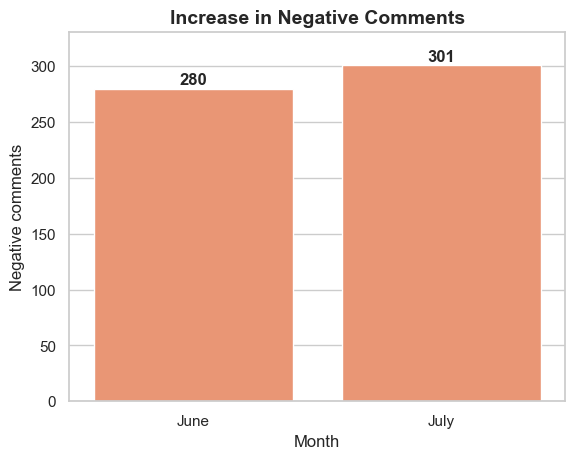

In [59]:
# new list with numbers to plot (1 row, 2 columns/numbers)
neg_comm_m1 = round(neg_comm_m1)   # convert the grouping result (Pandas Series) to float
neg_comm_m2 = round(neg_comm_m2)   # convert the grouping result (Pandas Series) to float
df_neg_comm = [neg_comm_m1, neg_comm_m2]   # prepare the list

# Seaborn style to get the grid
sns.set(style='whitegrid')

# some more aesthetics
labels = ['June', 'July']   # labels for x axis (set below)
colors = ['#fc8d62', '#fc8d62']  # custom color to fit the presentation design

# create bar plot
sns.barplot(x=labels, y=df_neg_comm, palette=colors)

# labels on top of the bars
for index, value in enumerate(df_neg_comm):
    plt.text(index, value + 1, f'{value}', ha='center', va='bottom', fontsize=12, fontweight='bold')

# axes labels and title
plt.xlabel('Month', fontsize=12)
plt.ylabel('Negative comments', fontsize=12)
plt.title('Increase in Negative Comments', fontsize=14, fontweight='bold')

# change y range
plt.ylim(0, max(df_neg_comm) + 30)

# save and/or display the plot
# plt.savefig('../vizzes/neg_comm_plot.png', dpi=300)
plt.show()

**Kill rate**

There is 102 entries with kill rate over 100% out of 670:

In [29]:
print(df_deliverando_wide.shape)
print(df_deliverando_wide[df_deliverando_wide['kill_rate']>100].shape)

(670, 8)
(102, 8)


I decided to continue analyzing the kill rate. However, I dropped the lines with values exceeding 100%.

In [30]:
df_kill_rate = df_deliverando_wide.loc[~(df_deliverando_wide['kill_rate']>100)]
df_kill_rate.reset_index(drop=True, inplace=True)

Calculate the change of average kill rate between the two months.

In [31]:
kill_rate_avg_m1 = df_kill_rate[df_kill_rate['month']=='month_1']['kill_rate'].mean()
kill_rate_avg_m2 = df_kill_rate[df_kill_rate['month']=='month_2']['kill_rate'].mean()
kill_rate_avg_ratio = (kill_rate_avg_m2/kill_rate_avg_m1-1)*100
print(kill_rate_avg_m1, kill_rate_avg_m2, kill_rate_avg_ratio)

56.88325 55.51029761904762 -2.41363209899641


Visualization - 2 bars showing the numbers for both months.

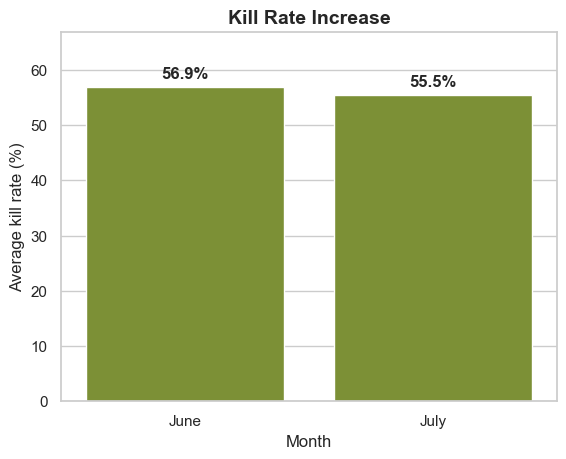

In [60]:
# new list with numbers to plot (1 row, 2 columns/numbers)
kill_rate_avg_m1 = round(kill_rate_avg_m1, 1)   # convert the grouping result (Pandas Series) to float
kill_rate_avg_m2 = round(kill_rate_avg_m2, 1)   # convert the grouping result (Pandas Series) to float
df_plot_kill_rate = [kill_rate_avg_m1, kill_rate_avg_m2]   # prepare the list

# Seaborn style to get the grid (not needed if executed before)
# sns.set(style='whitegrid')

# some more aesthetics
labels = ['June', 'July']   # labels for x axis (set below)
colors = ['#849f27', '#849f27']  # custom color to fit the presentation design

# create bar plot
sns.barplot(x=labels, y=df_plot_kill_rate, palette=colors)

# labels on top of the bars
for index, value in enumerate(df_plot_kill_rate):
    plt.text(index, value + 1, f'{value}%', ha='center', va='bottom', fontsize=12, fontweight='bold')

# axes labels and title
plt.xlabel('Month', fontsize=12)
plt.ylabel('Average kill rate (%)', fontsize=12)
plt.title('Kill Rate Increase', fontsize=14, fontweight='bold')

# change y range
plt.ylim(0, max(df_plot_kill_rate) + 10)

# save and/or display the plot
# plt.savefig('../vizzes/kill_rate_plot.png', dpi=300)
plt.show()

**Average time to accept**

Create a new data frame for calculation of weighted averages to investigate about the change in Time to Accept.

Choose the relevant columns.

In [33]:
df_time = df_deliverando_wide[['franchise_name', 'month', 'orders', 'avg_acc_time']]

Multiply number of orders by average time to accept of respective restaurant and month.

In [34]:
df_time['product'] = df_time['orders']*df_time['avg_acc_time']

C:\Users\radek\AppData\Local\Temp\ipykernel_13524\1342905669.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_time['product'] = df_time['orders']*df_time['avg_acc_time']


Calculate the change of average time to accept between the two months. The time slightly decreased.

In [35]:
acc_time_avg_m1 = df_time[df_time['month']=='month_1']['product'].sum()/\
df_time[df_time['month']=='month_1']['orders'].sum()
    # weighted average for June

acc_time_avg_m2 = df_time[df_time['month']=='month_2']['product'].sum()/\
df_time[df_time['month']=='month_2']['orders'].sum()
    # weighted average for July

acc_time_avg_ratio = (acc_time_avg_m2/acc_time_avg_m1-1)*100
print(acc_time_avg_m1, acc_time_avg_m2, acc_time_avg_ratio)

197.36499121133923 195.65510545336858 -0.8663571728076636


Let's see how much absolute time we saved for all the customers overall. This time, we calculate sums of the numerical products only. The total saved time is 327,065 s, which is approx 3.8 days.

In [36]:
acc_time_sum_m1 = df_time[df_time['month']=='month_1']['product'].sum()
acc_time_sum_m2 = df_time[df_time['month']=='month_2']['product'].sum()
acc_time_avg_diff = acc_time_sum_m2 - acc_time_sum_m1
print(acc_time_sum_m1, acc_time_sum_m2, acc_time_avg_diff)

10554685.0 10881750.0 327065.0


Visualization - 2 bars showing the numbers for both months.

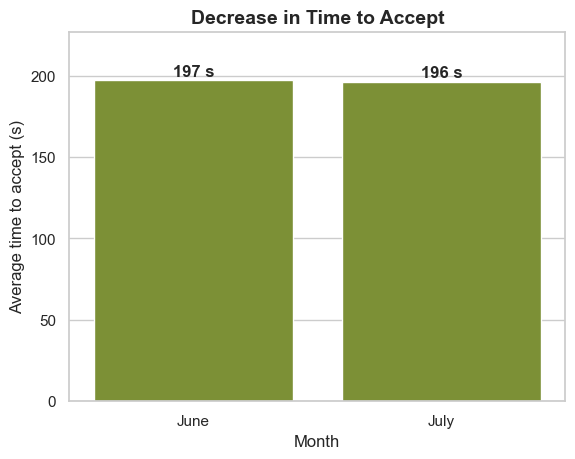

In [61]:
# new list with numbers to plot (1 row, 2 columns/numbers)
df_plot_acc_time = [round(acc_time_avg_m1), round(acc_time_avg_m2)]   # prepare the list

# Seaborn style to get the grid (not needed if executed before)
# sns.set(style='whitegrid')

# some more aesthetics
labels = ['June', 'July']   # labels for x axis (set below)
colors = ['#849f27', '#849f27']  # custom color to fit the presentation design

# create bar plot
sns.barplot(x=labels, y=df_plot_acc_time, palette=colors)

# labels on top of the bars
for index, value in enumerate(df_plot_acc_time):
    plt.text(index, value + 1, f'{value} s', ha='center', va='bottom', fontsize=12, fontweight='bold')

# axes labels and title
plt.xlabel('Month', fontsize=12)
plt.ylabel('Average time to accept (s)', fontsize=12)
plt.title('Decrease in Time to Accept', fontsize=14, fontweight='bold')

# change y range
plt.ylim(0, max(df_plot_acc_time) + 30)

# save and/or display the plot
# plt.savefig('../vizzes/acc_time_plot.png', dpi=300)
plt.show()

**Average basket size**

Create a new data frame for calculation of weighted averages to investigate about the change in Average Basket Size.

Choose the relevant columns.

In [38]:
df_basket = df_deliverando_wide[['franchise_name', 'month', 'orders', 'avg_basket_size']]

Multiply number of orders by average basket size of respective restaurant and month.

In [39]:
df_basket['product'] = df_basket['orders']*df_basket['avg_basket_size']

C:\Users\radek\AppData\Local\Temp\ipykernel_13524\1682125095.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_basket['product'] = df_basket['orders']*df_basket['avg_basket_size']


Calculate the change of average basket size between the two months. We can see a tiny decrease of about 5 cents per average.

In [40]:
avg_basket_m1 = df_basket[df_basket['month']=='month_1']['product'].sum()/\
df_basket[df_basket['month']=='month_1']['orders'].sum()
    # weighted average for June

avg_basket_m2 = df_basket[df_basket['month']=='month_2']['product'].sum()/\
df_basket[df_basket['month']=='month_2']['orders'].sum()
    # weighted average for July

avg_basket_ratio = (avg_basket_m2/avg_basket_m1-1)*100
print(avg_basket_m1, avg_basket_m2, avg_basket_ratio)

21.384835820337337 21.374846899329338 -0.04671030019551825


**Let us calculate an important parameter: the sales for both months.**

I continue the above calculation but only considedr the sums of products now. We can see that despite the tiny change in average basket size,  the sales rose by about €45,000.

In [41]:
sales_m1 = df_basket[df_basket['month']=='month_1']['product'].sum()
sales_m2 = df_basket[df_basket['month']=='month_2']['product'].sum()
sales_diff = sales_m2 - sales_m1
print(sales_m1, sales_m2, sales_diff)

1143618.25 1188804.8599999999 45186.60999999987


Visualization - 2 bars showing the sales for both months.

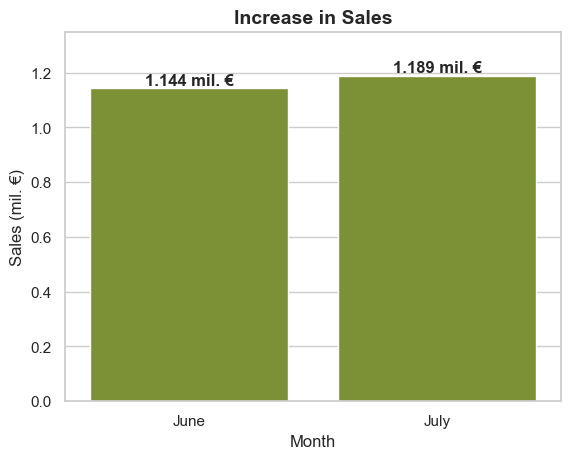

In [84]:
# new list with numbers to plot (1 row, 2 columns/numbers)
df_plot_basket = [round(sales_m1/1000000, 3), round(sales_m2/1000000, 3)]   # prepare the list

# Seaborn style to get the grid (not needed if executed before)
# sns.set(style='whitegrid')

# some more aesthetics
labels = ['June', 'July']   # labels for x axis (set below)
colors = ['#849f27', '#849f27']  # custom color to fit the presentation design

# create bar plot
sns.barplot(x=labels, y=df_plot_basket, palette=colors)

# labels on top of the bars
for index, value in enumerate(df_plot_basket):
    plt.text(index, value, f'{value} mil. €', ha='center', va='bottom', fontsize=12, fontweight='bold')

# axes labels and title
plt.xlabel('Month', fontsize=12)
plt.ylabel('Sales (mil. €)', fontsize=12)
plt.title('Increase in Sales', fontsize=14, fontweight='bold')

# change y range
plt.ylim(0, 1.35)

# save and/or display the plot
# plt.savefig('../vizzes/sales_plot.png', dpi=300)
plt.show()

## Further research questions <a id='further'></a>

### 1. How many restaurants are active on Deliverando or our competitors in the given months?
### *+ How much have the respective platforms grown?*

We need to specify, whether we are interested in the number of restaurant compenies (chains) or individual locations (franchices). I decided to focus on the number of companies so I use the original 'df_deliverando' in this section.

In [42]:
no_deliverando_m1 = df_deliverando[(df_deliverando['kpi']=='# Commissionable Orders') &\
                                   (df_deliverando['month_1']>0)]['name'].nunique()
                                    # unique restaurant names with non-zero orders in the given month
no_deliverando_m2 = df_deliverando[(df_deliverando['kpi']=='# Commissionable Orders') &\
                                   (df_deliverando['month_2']>0)]['name'].nunique()
growth_deliverando = round((no_deliverando_m2/no_deliverando_m1-1)*100, 1)
print(f'Deliverando: {no_deliverando_m1} restaurants in Month 1, {no_deliverando_m2} restaurants in Month 2 \
(growth of {growth_deliverando} %).')

no_competition_m1 = df_competition_month1[df_competition_month1['orders']>0]['name'].nunique()
no_competition_m2 = df_competition_month2[df_competition_month2['orders']>0]['name'].nunique()
growth_competition = round((no_competition_m2/no_competition_m1-1)*100, 1)
print(f'Competition: {no_competition_m1} restaurants in Month 1, {no_competition_m2} restaurants in Month 2 \
(growth of {growth_competition} %).')


Deliverando: 212 restaurants in Month 1, 217 restaurants in Month 2 (growth of 2.4 %).
Competition: 266 restaurants in Month 1, 276 restaurants in Month 2 (growth of 3.8 %).


Plot the results as pie charts.

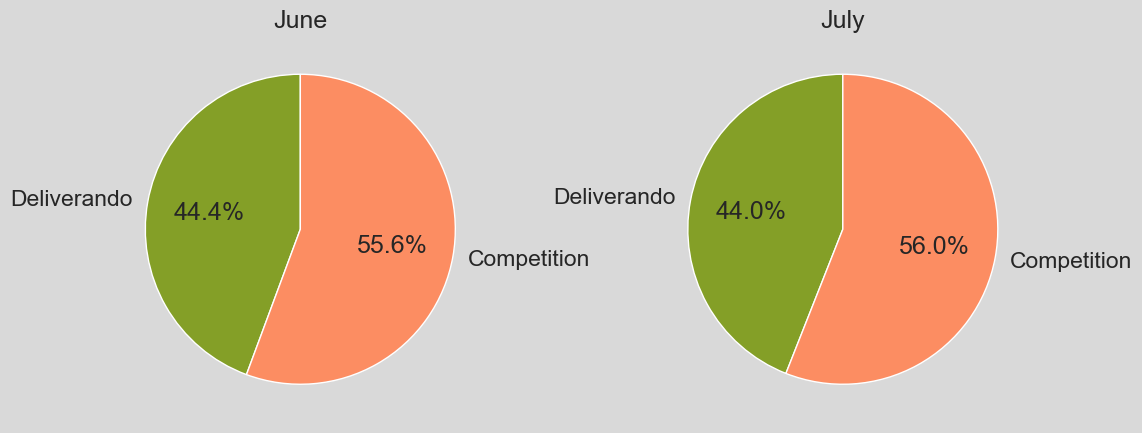

In [85]:
# lists of values to plot
restaurants_month1 = [no_deliverando_m1, no_competition_m1]
restaurants_month2 = [no_deliverando_m2, no_competition_m2]

# some more aesthetics
companies = ['Deliverando', 'Competition']   # labels
colors = ['#849f27', '#fc8d62']
sns.set(font_scale=1.5)   # set font size to double

# figure with 2 subplots, one for each month
# facecolor for background, gridspec_kw sets the separation of both subplots
fig, axs = plt.subplots(1, 2, figsize=(12, 6), facecolor='#d9d9d9', gridspec_kw={'wspace': 0.4})

# pie chart for June
axs[0].pie(restaurants_month1, labels=companies, autopct='%1.1f%%', startangle=90, colors=colors)
axs[0].set_title('June')

# pie chart for July
axs[1].pie(restaurants_month2, labels=companies, autopct='%1.1f%%', startangle=90, colors=colors)
axs[1].set_title('July')

# save and/or display the plot
# plt.savefig('../vizzes/comparison_pie.png', dpi=300)
plt.show()

To now if we should worry about the trend of growing share market of the population, we need to specify the significance level which is interesting for us. Commonly, we use 5 % certainty. In that case, our p-value is smaller and therefore the result is statistically significant.

In [44]:
# prepare the data to compare
data = pd.DataFrame([[no_deliverando_m1, no_competition_m1],[no_deliverando_m2, no_competition_m2]])

# t-test (A/B test) to determine statistical significance of the shift
test_statistic, pvalue = stats.ttest_ind(data[0], data[1])
print (test_statistic, pvalue)

-10.107027258299048 0.009647892787967403


### 2. How many restaurants are exclusively online with our competitors and not available on deliverando?

Find out what is the set difference between the restaurants registered on both platforms.

In [45]:
set_competition = set(df_competition_month1['name'].unique())|set(df_competition_month2['name'].unique())
set_deliverando = set(df_deliverando['name'].unique())
only_competition = sorted(set_competition - set_deliverando, key=lambda x: x.lower()) # sorts regardless upper / lowercase

only_comp_str = ', '.join(only_competition) # makes a string out of list items
print(f'There are {len(only_competition)} restaurants solely on competing platforms.\n\
These are:', only_comp_str + '.')

There are 118 restaurants solely on competing platforms.
These are: Alpine Burg, Bauer Taverne, Berg Alm, Bergdorf Palast, Blaue Schlemmerparadies, Blaue Schmiede, Blauer Hofladen, Blumen Brauhaus, Blumen Dorf, Blumen Hütte, Bunte Alm, Bunte Stuben, Bustling Pizzeria, Bustling Weinbistro, Bustling Winkel, Countrified Feuerstelle, Edelweiß Ratsstube, Edelweiß Stuben, Ehrwürdige Brauerei, Ehrwürdige Gastgewölbe, Ehrwürdige Jausenstation, Ehrwürdige Palast, Einsame Gastzimmer, Erfahrene Scheune, Festliche Bodega, Festliche Kneipe, Festliche Tisch, Fischer Dorfschenke, Fröhliche Felsenkeller, Fröhliche Hofladen, Gastfreundliche Esszimmer, Gasthof Festscheune, Gasthof Gasthof, Gebackene Rathskeller, Geheimnisvolle Wanderhütte, Gesellige Brauerei, Gesellige Speiselokal, Glanzvolle Alm, Glänzende Tanzlokal, Goldene Biergarten, Gute Blick, Heimat Eck, Heimat Schenke, Herbstliche Brauhaus, Herbstliche Hofbräu, Herzliche See, Herzliche Stadl, Herzliche Stube, Himmel Bauernhof, Holz Wanderhütte, 

### 3. Which restaurants have placed the most orders with our competitors (top 10)?

To analyze this question, I need to join competition's data frames for both months. This creates two new columns with month names, carrying no information, so I drop them, and rename the columns with orders. Finally, I calculate the sum of orders from both months.

In [46]:
# inner join
df_competition = pd.merge(df_competition_month1, df_competition_month2, how='inner', on=['name', 'delivery_service'])

# dropping and renaming columns
df_competition = df_competition.drop(['month_x', 'month_y', 'zip_x', 'zip_y', 'delivery_service'], axis='columns')
df_competition.rename(columns={'orders_x':'month_1', 'orders_y':'month_2'}, inplace=True)

# sum of orders
df_competition['orders_total'] = df_competition['month_1'] + df_competition['month_2']
df_competition.head()

,name,month_1,month_2,orders_total
0,Bustling Weinbistro,569,672,1241
1,Ruhige Gourmet,127,75,202
2,Bunte Alm,574,542,1116
3,Festliche Schänke,40,78,118
4,Stern Hofladen,9,323,332


In this data frame, we have multiple occurrences of the same restaurant names (franchises), sometimes with different ZIP code. I group by name and sum the results up to get a table for restaurant chains.

In [47]:
df_competition = df_competition.groupby('name')[['month_1', 'month_2', 'orders_total']].sum().reset_index()

Sort by 'orders_total' to get the TOP10.

In [48]:
# sort

df_competition = df_competition.sort_values('orders_total', ascending=False).reset_index(drop=True)
df_competition.head(10)

,name,month_1,month_2,orders_total
0,Kleine Brauerei,6948,10290,17238
1,Bäuerliche Waldhaus,8193,6204,14397
2,Fröhliche Taverna,4886,5876,10762
3,Kaiser Salons,3468,3726,7194
4,Ruhige Soda fountain,2904,1944,4848
5,Große Küche,1722,2374,4096
6,Kleine Soda fountain,1658,2378,4036
7,Bäuerliche Festscheune,2094,1758,3852
8,Neue Burg,1905,1244,3149
9,Blumen Hütte,1133,1679,2812


### *Are these restaurants also active on deliverando and if so, how did the orders on the deliverando platform compare to the performance on the competitor platform?*

Calculate total orders over 2 months for Deliverando by grouping and summing up.

In [49]:
df_deliverando_totals = df_deliverando_wide[['franchise_name', 'month', 'orders']]
df_deliverando_totals = df_deliverando_totals.groupby('franchise_name')['orders'].sum().reset_index()
df_deliverando_totals.rename(columns={'orders':'orders_total'}, inplace=True)
df_deliverando_totals.head()

,franchise_name,orders_total
0,Adventurous Brauerei No. 1,15.0
1,Adventurous Brauhaus No. 1,102.0
2,Adventurous Rathskeller No. 1,0.0
3,Alpen Alm No. 1,535.0
4,Alpen Stadl No. 1,2531.0


Sum up results for all franchises within restaurant companies (chains).

In [50]:
# function to split the name by 'No.' and keep the first part only
def extract_chain_name(name):
    parts = name.split('No.')   # splitting
    return parts[0].strip()   # stripping the remaining part

# restaurant company (chain) as a new column
df_deliverando_totals['name'] = df_deliverando_totals['franchise_name'].apply(extract_chain_name)

# group by 'company' and sum up results
df_deliverando_totals = df_deliverando_totals.groupby('name')['orders_total'].sum().reset_index()

In [51]:
# #################### test: there are restaurants with orders from both delivery services
# set_competition = set(df_competition[df_competition['orders_total']>0]['name'].unique())
# set_deliverando = set(df_deliverando_totals[df_deliverando_totals['orders_total']>0]['name'].unique())

# intersection = set_competition & set_deliverando
# intersection

Merge data frames for competition and Deliverando (outer join to keep all data).

In [52]:
# left join with competition

df_all = pd.merge(left = df_competition, right = df_deliverando_totals, how='outer', on=['name'])
df_all = df_all.rename(columns={'orders_total_x':'orders_competition', 'orders_total_y':'orders_deliverando'})

Show TOP10 competition restaurants.

In [53]:
df_top_10 = df_all.head(10)
df_top_10

,name,month_1,month_2,orders_competition,orders_deliverando
0,Kleine Brauerei,6948.0,10290.0,17238.0,11738.0
1,Bäuerliche Waldhaus,8193.0,6204.0,14397.0,92.0
2,Fröhliche Taverna,4886.0,5876.0,10762.0,1580.0
3,Kaiser Salons,3468.0,3726.0,7194.0,NaN
4,Ruhige Soda fountain,2904.0,1944.0,4848.0,1095.0
5,Große Küche,1722.0,2374.0,4096.0,1674.0
6,Kleine Soda fountain,1658.0,2378.0,4036.0,1047.0
7,Bäuerliche Festscheune,2094.0,1758.0,3852.0,2660.0
8,Neue Burg,1905.0,1244.0,3149.0,NaN
9,Blumen Hütte,1133.0,1679.0,2812.0,NaN


Plot the results as a bar chart.

First, I melt the results into long format for easier plotting.

In [54]:
df_melted = df_top_10.melt(id_vars=['name'], value_vars=['orders_competition', 'orders_deliverando'], 
                    var_name='company', value_name='orders_total')

Plot.

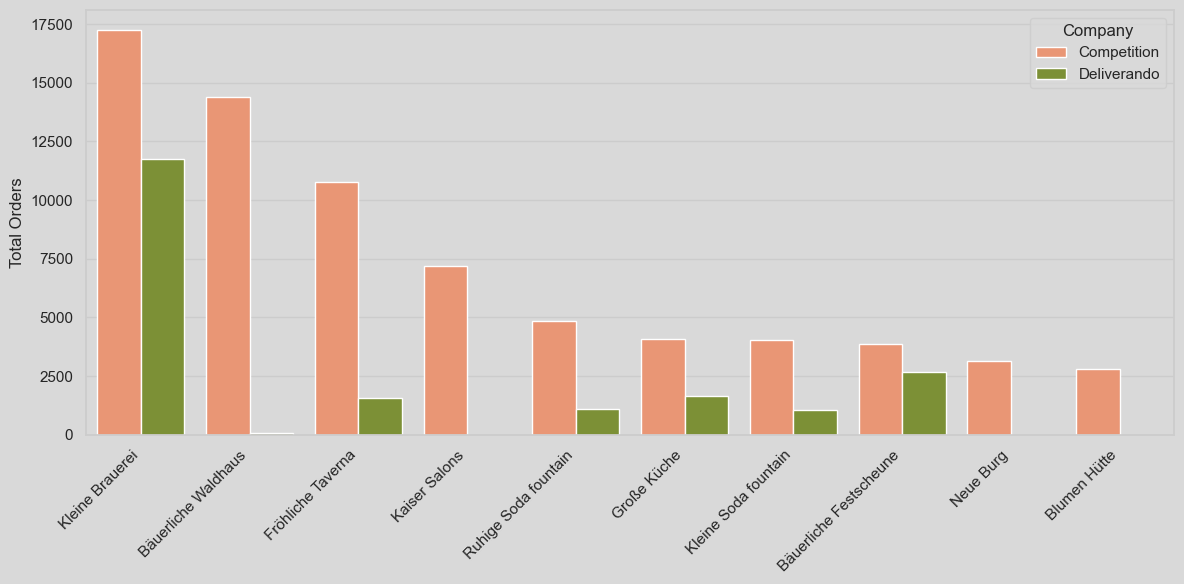

In [97]:
# Seaborn style to get the grid and grey background
sns.set(style='whitegrid', rc={'axes.facecolor': '#d9d9d9', 'figure.facecolor': '#d9d9d9'})

# aspect ratio
plt.figure(figsize=(12, 6))

# create bar plot
plot_comparison = sns.barplot(x='name', y='orders_total', hue='company', data=df_melted, palette=['#fc8d62', '#849f27'])

# axes labels, title, legend
plt.xlabel('')
plt.ylabel('Total Orders')
plt.title('')
plt.xticks(rotation=45, ha='right')   # rotate x-axis labels

# modify legend
legend_labels = {'orders_competition': 'Competition', 'orders_deliverando': 'Deliverando'}
handles, _ = plot_comparison.get_legend_handles_labels()
plot_comparison.legend(handles=handles, labels=[legend_labels[label] for label in df_melted['company'].unique()],\
                       title='Company', loc='upper right')

plt.tight_layout()

# save and/or display the plot
plt.savefig('../vizzes/comparison_companies.png', dpi=300)
plt.show()